   # Bankruptcy Prediction - Decision Tree and Random Forests
   Weiru Kuo
   * Introduction
   * Importing Libraries and Data
   * Exploratory Data Analysis and Data Preprocessing
   * Modeling
   * Conclusions

# Introduction

In this analysis we build machine learning models using key financial ratios to predict whether a company goes bankrupt or not. Also we examine whether random forests algorithm performs better than decision tree.

The data file can be downloaded from Kaggle: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction?resource=download

The data were from 1999 to 2009, originally collected from the Taiwan Economic Journal. Company bankruptcy was defined based on the regulations of the Taiwan Stock Exchange.

Columns are as below.

* Y - Bankrupt?: Class label
* X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)
* X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)
* X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)
* X4 - Operating Gross Margin: Gross Profit/Net Sales
* X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales
* X6 - Operating Profit Rate: Operating Income/Net Sales
* X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales
* X8 - After-tax net Interest Rate: Net Income/Net Sales
* X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio
* X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales
* X11 - Operating Expense Rate: Operating Expenses/Net Sales
* X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales
* X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities
* X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity
* X15 - Tax rate (A): Effective Tax Rate
* X16 - Net Value Per Share (B): Book Value Per Share(B)
* X17 - Net Value Per Share (A): Book Value Per Share(A)
* X18 - Net Value Per Share (C): Book Value Per Share(C)
* X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income
* X20 - Cash Flow Per Share
* X21 - Revenue Per Share (Yuan ¥): Sales Per Share
* X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share
* X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share
* X24 - Realized Sales Gross Profit Growth Rate
* X25 - Operating Profit Growth Rate: Operating Income Growth
* X26 - After-tax Net Profit Growth Rate: Net Income Growth
* X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth
* X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
* X29 - Total Asset Growth Rate: Total Asset Growth
* X30 - Net Value Growth Rate: Total Equity Growth
* X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth
* X32 - Cash Reinvestment %: Cash Reinvestment Ratio
* X33 - Current Ratio
* X34 - Quick Ratio: Acid Test
* X35 - Interest Expense Ratio: Interest Expenses/Total Revenue
* X36 - Total debt/Total net worth: Total Liability/Equity Ratio
* X37 - Debt ratio %: Liability/Total Assets
* X38 - Net worth/Assets: Equity/Total Assets
* X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets
* X40 - Borrowing dependency: Cost of Interest-bearing Debt
* X41 - Contingent liabilities/Net worth: Contingent Liability/Equity
* X42 - Operating profit/Paid-in capital: Operating Income/Capital
* X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital
* X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity
* X45 - Total Asset Turnover
* X46 - Accounts Receivable Turnover
* X47 - Average Collection Days: Days Receivable Outstanding
* X48 - Inventory Turnover Rate (times)
* X49 - Fixed Assets Turnover Frequency
* X50 - Net Worth Turnover Rate (times): Equity Turnover
* X51 - Revenue per person: Sales Per Employee
* X52 - Operating profit per person: Operation Income Per Employee
* X53 - Allocation rate per person: Fixed Assets Per Employee
* X54 - Working Capital to Total Assets
* X55 - Quick Assets/Total Assets
* X56 - Current Assets/Total Assets
* X57 - Cash/Total Assets
* X58 - Quick Assets/Current Liability
* X59 - Cash/Current Liability
* X60 - Current Liability to Assets
* X61 - Operating Funds to Liability
* X62 - Inventory/Working Capital
* X63 - Inventory/Current Liability
* X64 - Current Liabilities/Liability
* X65 - Working Capital/Equity
* X66 - Current Liabilities/Equity
* X67 - Long-term Liability to Current Assets
* X68 - Retained Earnings to Total Assets
* X69 - Total income/Total expense
* X70 - Total expense/Assets
* X71 - Current Asset Turnover Rate: Current Assets to Sales
* X72 - Quick Asset Turnover Rate: Quick Assets to Sales
* X73 - Working capitcal Turnover Rate: Working Capital to Sales
* X74 - Cash Turnover Rate: Cash to Sales
* X75 - Cash Flow to Sales
* X76 - Fixed Assets to Assets
* X77 - Current Liability to Liability
* X78 - Current Liability to Equity
* X79 - Equity to Long-term Liability
* X80 - Cash Flow to Total Assets
* X81 - Cash Flow to Liability
* X82 - CFO to Assets
* X83 - Cash Flow to Equity
* X84 - Current Liability to Current Assets
* X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise
* X86 - Net Income to Total Assets
* X87 - Total assets to GNP price
* X88 - No-credit Interval
* X89 - Gross Profit to Sales
* X90 - Net Income to Stockholder's Equity
* X91 - Liability to Equity
* X92 - Degree of Financial Leverage (DFL)
* X93 - Interest Coverage Ratio (Interest expense to EBIT)
* X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
* X95 - Equity to Liability

# Importing Libraries and Data

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
#Decision tree model
from sklearn.tree import DecisionTreeClassifier
#Random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Get the Data

In [2]:
data = pd.read_csv('bankruptcy_data.csv')

In [3]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


The first column "Bankrupt?" will be the label that the model tries to predict. There are many, 95 total, features. To reduce noise and focus on some key ratios, we will select 9 key ratios that often used as early warning signs for predicting bankruptcy.

To be specific, we will choose the columns below.
* Y - Bankrupt?: Class label
* X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)
* X4 - Operating Gross Margin: Gross Profit/Net Sales
* X33 - Current Ratio
* X37 - Debt ratio %: Liability/Total Assets
* X54 - Working Capital to Total Assets
* X75 - Cash Flow to Sales
* X81 - Cash Flow to Liability
* X89 - Gross Profit to Sales
* X91 - Liability to Equity

In [4]:
data=data[['Bankrupt?',' ROA(B) before interest and depreciation after tax',' Operating Gross Margin',' Current Ratio',' Debt ratio %',' Working Capital to Total Assets',' Cash Flow to Sales',' Cash Flow to Liability',' Gross Profit to Sales',' Liability to Equity']]

# Exploratory Data Analysis

Checking no missing data

In [5]:
data.isnull().sum()

Bankrupt?                                             0
 ROA(B) before interest and depreciation after tax    0
 Operating Gross Margin                               0
 Current Ratio                                        0
 Debt ratio %                                         0
 Working Capital to Total Assets                      0
 Cash Flow to Sales                                   0
 Cash Flow to Liability                               0
 Gross Profit to Sales                                0
 Liability to Equity                                  0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 10 columns):
Bankrupt?                                             6819 non-null int64
 ROA(B) before interest and depreciation after tax    6819 non-null float64
 Operating Gross Margin                               6819 non-null float64
 Current Ratio                                        6819 non-null float64
 Debt ratio %                                         6819 non-null float64
 Working Capital to Total Assets                      6819 non-null float64
 Cash Flow to Sales                                   6819 non-null float64
 Cash Flow to Liability                               6819 non-null float64
 Gross Profit to Sales                                6819 non-null float64
 Liability to Equity                                  6819 non-null float64
dtypes: float64(9), int64(1)
memory usage: 532.8 KB


No categorical features. All numerical.

Checking if the label is balanced or not. From the count plot this is an imbalanced dataset. In binary classification task, if the class distribution is highly skewed, accuracy will become an unreliable measure of model performance. 

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

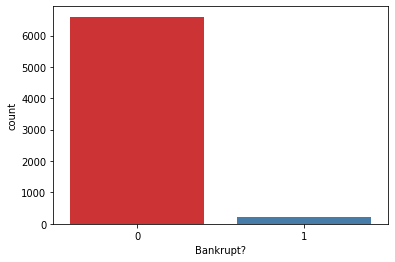

In [7]:
sns.countplot(x='Bankrupt?',data=data,palette='Set1')

There are many ways of balancing dataset. Here we simply reduce the number of the higher one. First we get the total count of the companies that went bankrupt, then randomly sample the same number from companies did not go bankrupt. Finally we combine both together to be the new dataset.

In [8]:
print(len(data[data['Bankrupt?']==1]))

220


In [9]:
df_not_bankrupt=data[data['Bankrupt?']==0].sample(220)

In [10]:
data=data[data['Bankrupt?']==1].append(df_not_bankrupt)

The dataframe now has all Bankrupt?=1 on the top and 0 at the bottom. So we mix them by sorting based on original index.

In [11]:
data.sort_index().head(15)

,Bankrupt?,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Current Ratio,Debt ratio %,Working Capital to Total Assets,Cash Flow to Sales,Cash Flow to Liability,Gross Profit to Sales,Liability to Equity
0,1,0.405750,0.601457,0.002259,0.207576,0.672775,0.671568,0.458609,0.601453,0.290202
1,1,0.516730,0.610235,0.006016,0.171176,0.751111,0.671570,0.459001,0.610237,0.283846
2,1,0.472295,0.601450,0.011543,0.207516,0.829502,0.671571,0.459254,0.601449,0.290189
3,1,0.457733,0.583541,0.004194,0.151465,0.725754,0.671519,0.448518,0.583538,0.281721
4,1,0.522298,0.598783,0.006022,0.106509,0.751822,0.671563,0.454411,0.598782,0.278514
5,1,0.419134,0.590171,0.002740,0.180427,0.686729,0.671568,0.458499,0.590172,0.285087
18,0,0.558649,0.598344,0.007220,0.141337,0.766580,0.671573,0.459403,0.598345,0.280839
29,1,0.463783,0.599115,0.004292,0.219609,0.703730,0.671567,0.457681,0.599110,0.293599
30,1,0.514428,0.599987,0.002124,0.228890,0.673325,0.671577,0.459675,0.599984,0.297038
42,0,0.559077,0.618177,0.011685,0.086646,0.801108,0.671586,0.464122,0.618178,0.277532


In [12]:
data=data.sort_index()

In [13]:
data.describe()

,Bankrupt?,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Current Ratio,Debt ratio %,Working Capital to Total Assets,Cash Flow to Sales,Cash Flow to Liability,Gross Profit to Sales,Liability to Equity
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.500000,0.508732,0.603169,0.010543,0.149342,0.783290,0.671569,0.459308,0.603167,0.286764
std,0.500569,0.087735,0.013799,0.009925,0.065470,0.066157,0.000072,0.029784,0.013799,0.048958
min,0.000000,0.033514,0.532906,0.000355,0.001088,0.494210,0.670866,0.073969,0.532907,0.000000
25%,0.000000,0.480178,0.596787,0.005214,0.103682,0.740300,0.671563,0.457390,0.596783,0.278271
50%,0.500000,0.523877,0.601655,0.007908,0.151253,0.782821,0.671571,0.459174,0.601652,0.281335
75%,1.000000,0.556494,0.609352,0.012489,0.194214,0.828499,0.671580,0.461378,0.609349,0.286924
max,1.000000,0.676107,0.665151,0.107802,0.525410,0.965272,0.672328,0.653087,0.665149,1.000000


From the statistics we can see the columns and the final rows of data we will be analysing are all between 0 and 1. Note that standard deviation of 'Cash Flow to Sales' is very low, which is reflected on how close the minimum and maximum numbers are. 

Text(0.5, 0, 'ROA(B)')

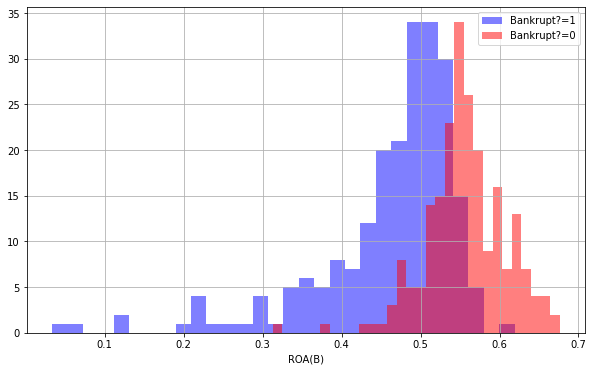

In [14]:
plt.figure(figsize=(10,6))
data[data['Bankrupt?']==1][' ROA(B) before interest and depreciation after tax'].hist(alpha=0.5,color='blue',bins=30,label='Bankrupt?=1')
data[data['Bankrupt?']==0][' ROA(B) before interest and depreciation after tax'].hist(alpha=0.5,color='red',bins=30,label='Bankrupt?=0')

plt.legend()
plt.xlabel('ROA(B)')

As expected that ROA of companies went bankrupt (Bankrupt?=1) are on the lower side. ROA should be a good feature to predict bankruptcy.

<Figure size 792x504 with 0 Axes>

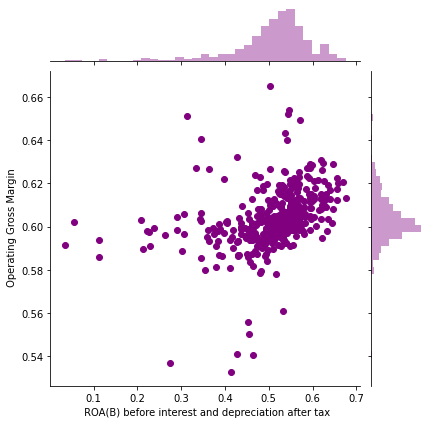

In [15]:
plt.figure(figsize=(11,7))
sns.jointplot(x=' ROA(B) before interest and depreciation after tax',y=' Operating Gross Margin',data=data,color='purple')

ROA and Operating gross margin are both profitability ratio. It makes sense to see there is a positive correlation between them.

Here we can see the correlation between all features.

<AxesSubplot:>

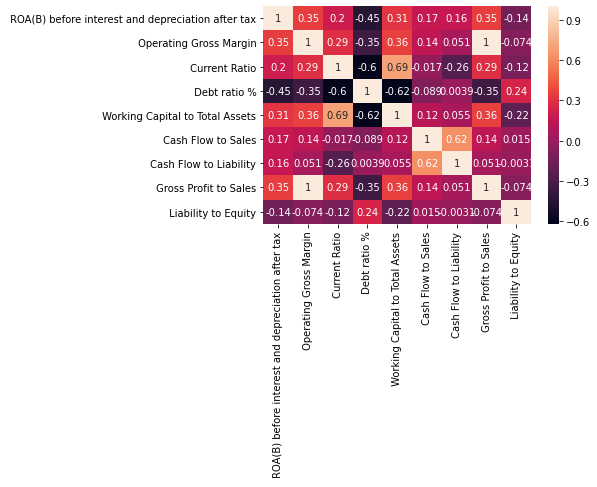

In [16]:
sns.heatmap(data.drop('Bankrupt?',axis=1).corr(),annot=True)

"Cash Flow to Sales" and "Cash Flow to Liability" have relative high positive correlation of 0.62. We can see from the figure below that both have close trend. It also slows that companies that went bankrupt had lower rate of both, with points scattered on the left bottom of the figure.

(0.0, 1.0)

<Figure size 792x504 with 0 Axes>

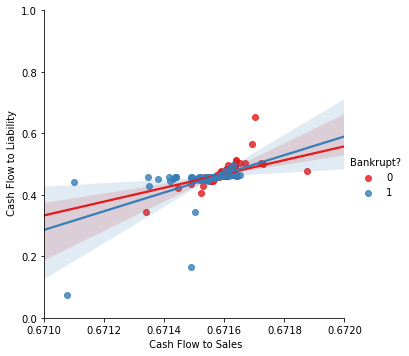

In [17]:
plt.figure(figsize=(11,7))
sns.lmplot(x=" Cash Flow to Sales",y=" Cash Flow to Liability",hue="Bankrupt?",data=data,palette='Set1')
plt.xlim(0.6710,0.6720)
plt.ylim(0,1)

Through the box plot we visualize how the distribution of each feature looks like. 
* ROA: Left skewed. Mostly around 0.5
* Operating Gross Margin: Narrow range around 0.6
* Current Ratio: All between 0 and 0.2. Narrow range. Right skewed
* Debt ratio %: Right skewed. Overall close to normal distribution. All below 0.55
* Working Capital to Total Assets: Overall close to normal distribution. Most data between 0.6 to 1
* Cash Flow to Sales: Highly centered on 0.67
* Cash Flow to Liability: Long left tails. Most data fall between 0.4 and 0.5
* Gross Profit to Sales: Very similar to Operating Gross Margin
* Liability to Equity: Long tails. Spread between 0 and 1. Majority numbers are between 0.2 and 0.4

<AxesSubplot:>

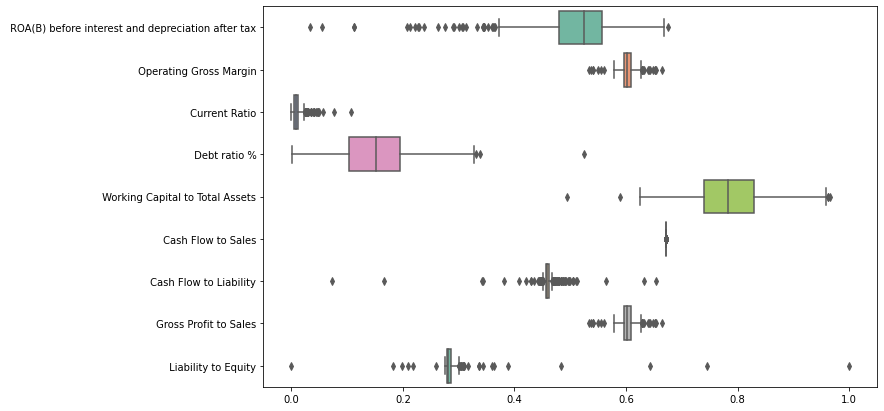

In [18]:
plt.figure(figsize=(11,7))
sns.boxplot(data=data.drop('Bankrupt?',axis=1), orient="h",palette='Set2')

As expected the **working Capital to Total Assets** is close to a bell-shaped normal distribution.

<AxesSubplot:xlabel=' Working Capital to Total Assets'>

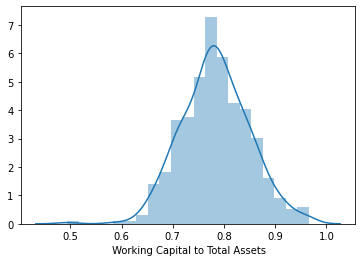

In [19]:
sns.distplot(data[' Working Capital to Total Assets'])

Given that distribution of **Gross Profit to Sale** and **Operating Gross Margin** are very alike, we remove the former.

In [20]:
del data[' Gross Profit to Sales']

As seen in statistics table and box plot, **Cash Flow to Sales** column has very close numbers throughout the data. Not a very informative feature so we remove it.

In [21]:
del data[' Cash Flow to Sales']

# Modeling

## Train Test Split
Split up the data into a training set and a test set

In [22]:
X=data.drop('Bankrupt?',axis=1)
y=data['Bankrupt?']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

Start by training a single decision tree first

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [24]:
dtree= DecisionTreeClassifier()

In [25]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation of Decision Tree

In [26]:
predictions= dtree.predict(X_test)

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        68
           1       0.75      0.86      0.80        64

   micro avg       0.80      0.80      0.80       132
   macro avg       0.80      0.80      0.80       132
weighted avg       0.80      0.80      0.79       132



**Precision, recall and f1 Score are good. All higher than 0.74. Average around 0.8.**

In [28]:
print(confusion_matrix(y_test,predictions))

[[50 18]
 [ 9 55]]


In [36]:
round((55+50)/(50+55+18+9),2)

0.8

               predicted                        
              0       1     
            -----     -----    
         0| 50 (TN) | 18 (FP)  
    actual  -----     ----- 
         1|  9 (FN) | 55 (TP)      
   
Accuracy is 0.8. Out of 132 samples only 27 (18+9) was mislabeled. Overall correct prediction.

## Training the Random Forest model
Compare a decision tree model to a random forest model

In [29]:
rfc= RandomForestClassifier(n_estimators=600)

Can play around with n_estimators. The larger the number, the longer the time it takes. Lower n_estimators has room to improve. It will reach to a point where increasing the number won't improve the accuracy.

In [30]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

Predict off the y_test values and evaluate the model.

**Predict the class of Bankrupt? for the X_test data.**

In [31]:
rfc_pred=rfc.predict(X_test)

In [32]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80        68
           1       0.75      0.94      0.83        64

   micro avg       0.82      0.82      0.82       132
   macro avg       0.84      0.82      0.82       132
weighted avg       0.84      0.82      0.82       132



**Precision, recall and f1-score for certain classes and the average have improved.**
**The recall of 0 decreases from 0.74 to 0.71. This is the only number decreases.**

In [33]:
print(confusion_matrix(y_test,rfc_pred))

[[48 20]
 [ 4 60]]


In [37]:
round((48+60)/(48+20+4+60),2)

0.82

Both models have good results. Compared to decision tree model, in this analysis random forest improved the performance in general. Accuracy increases from 0.8 to 0.82. The mislabled number also reduced to 24 (from 27). Both models have more false positive cases, predicting it will go bankupt but actually not, than false negative. Note that false positive case increases from 18 to 20. For even better performance, it's worth considering using more samples where label (Bankrupt?) is 0.

# Conclusions

* With key financial ratios (features) being selected, instead of using the original 95 columns, we can build pretty good model to predict banktruptcy
* Both decision tree and random forest predict accurately 80% of the time
* Random forest outperforms decision tree
* The data were for year 1999 to 2009. More recent data may lead to totally different results. If the data has industry or year information it will be interesting to explore changes by year and by industry
* More feature engineering and further analysis can potentially improve the performance. 
  For example, alternative ways of 
  * Selection of features from the original data
  * Number of rows sampled from "Bankrupt?"=0
  * Methods of dealing with imbalanced label
  * value of n_estimators, the parameter of random forest classifier
  
